In [24]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
X,Y=make_circles(n_samples = 10000,
                    noise= 0.05,
                    random_state=26)
                    
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,shuffle=True)

In [25]:
X_train.ndim

2

In [26]:
#to make the dataset
import numpy as np
import torch
import torch.nn as nn
from torch import optim #for importing the optimizer
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self,X,Y) :
        super().__init__()
        self.X=torch.from_numpy(X.astype(np.float32))  #to create pytorch tensors
        self.Y=torch.from_numpy(Y.astype(np.float32))
        self.len=self.X.shape[0]

    def __getitem__(self, index) :
        return self.X[index],self.Y[index]
    
    def __len__(self):
        return self.len
    
batch_size=64
train_data=DataLoader(dataset=Data(X_train,y_train),batch_size=batch_size,shuffle=True)
test_data=DataLoader(dataset=Data(X_test,y_test),batch_size=batch_size,shuffle=True)

for batch,(X,y) in enumerate(train_data):
    print(f'{batch+1}')
    print(f'X_shape:{X.shape}')
    print(f'Y_shape:{y.shape}')

    


1
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
2
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
3
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
4
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
5
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
6
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
7
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
8
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
9
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
10
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
11
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
12
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
13
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
14
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
15
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
16
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
17
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
18
X_shape:torch.Size([64, 2])
Y_shape:torch.Size([64])
1

In [27]:
input_dim=2 ##no. of features in the input 
hidden_dim=10
output_dim=1

class NeuralNet(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim) :
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(input_dim,hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim,output_dim),
            nn.Sigmoid()
        )
        #the other way to build it would be not to use the sequential and define layer1, layer2 independently 
        #then use them in the forward pass

    def forward(self,X):
        return self.model(X)
        
model=NeuralNet(input_dim,hidden_dim,output_dim)
print(model)
#we can use the model.parameters() to get model parameters

NeuralNet(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [28]:
#the nn module in the torch has loss functions in it already we just need to define them
learning_rate=0.01
loss_fn=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

training loop

In [32]:
num_epochs=100
loss_value=[]
for epochs in range(num_epochs):
    for X,y in train_data:
        optimizer.zero_grad() ##zeroing the parameter gradients,since we don't want the gradients from last batch to accumulate
        y_pred=model(X) #forward pass
        loss=loss_fn(y_pred,y.unsqueeze(-1))
        #since y_pred will have a dimension of (batch_size,1) and y has a dimension of (batch_size)
        #so we use unsqueeze(-1)
        loss_value.append(loss.item())
        loss.backward()
        optimizer.step()


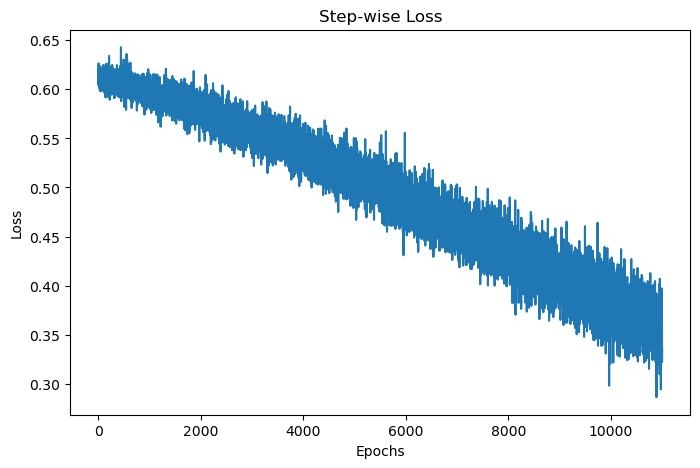

In [33]:
import matplotlib.pyplot as plt
step = range(len(loss_value))

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_value))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()